In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import pylab as pl
import datetime as dt

import math
import scipy.stats as scs
from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

## Part 2

### Question 1: Download closing price data for BMO (Bank of Montreal) and GS (Goldman Sachs) from Yahoo, for the period Jan 1, 2007 through Jan 1, 2011, using the Python yfinance library. Plot both time series on a single, 2x1 figure using the subplot command. Both plots should have titles and the x-axis ticks should be formatted as dates. Save the figure and paste it in a Word document.

In [2]:
# inputs BMO and GS from 2007-01-01 to 2011-01-01
market = "SPY"
t_bmo = 'BMO'
t_gs = 'GS'
start = '2007-01-01'
end = '2011-01-01'

# importing BMO and GS data 
df_bmo = yf.download(t_bmo,start,end)
df_gs = yf.download(t_gs,start,end)
stock_market = yf.download(market, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
df_bmo.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,59.290001,59.549999,59.029999,59.169998,30.140604,128200
2007-01-04,59.049999,59.090000,58.290001,58.790001,29.947041,359600
2007-01-05,58.590000,58.630001,58.240002,58.549999,29.824797,122100
2007-01-08,58.400002,58.669998,58.220001,58.330002,29.712721,61900
2007-01-09,58.250000,58.580002,58.000000,58.459999,29.778942,89100


In [4]:
df_gs.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,200.600006,203.320007,197.820007,200.720001,159.966034,6494900
2007-01-04,200.220001,200.669998,198.070007,198.850006,158.475754,6460200
2007-01-05,198.429993,200.000000,197.899994,199.050003,158.635132,5892900
2007-01-08,199.050003,203.949997,198.100006,203.729996,162.364929,7851000
2007-01-09,203.539993,204.899994,202.000000,204.080002,162.643845,7147100


### Answer for Question 1

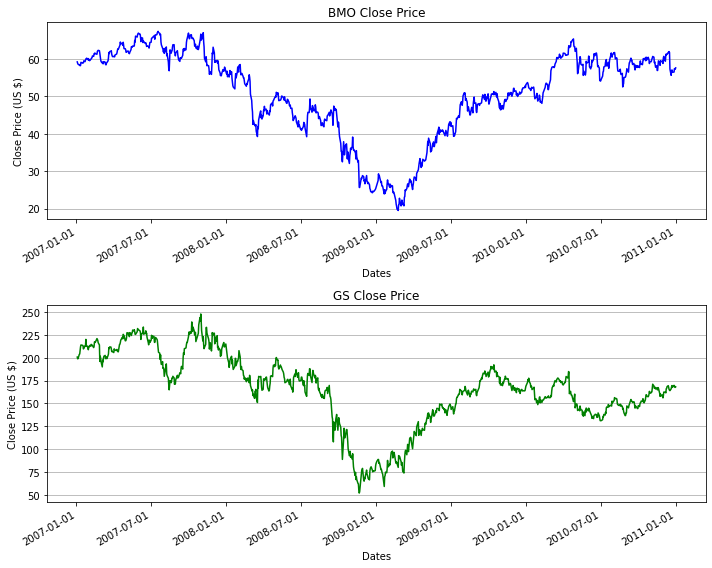

In [5]:
# plotting BMO
plt.subplot(2,1,1)

bmo_p = df_bmo['Close'].plot(figsize=(10,8), c = 'b')
plt.title('BMO Close Price')
plt.ylabel('Close Price (US $)')
plt.xlabel('Dates')
plt.grid(axis='y')
dateFmt = mdates.DateFormatter('%Y-%m-%d')
bmo_p.xaxis.set_major_formatter(dateFmt)

# plotting GS
plt.subplot(2,1,2)
gs_p = df_gs['Close'].plot(figsize=(10,8), c = 'g')
plt.title('GS Close Price')
plt.ylabel('Close Price (US $)')
plt.xlabel('Dates')
plt.grid(axis='y')
gs_p.xaxis.set_major_formatter(dateFmt)

plt.tight_layout()
plt.show()

### Question 2: Calculate the daily log returns for each series. For each security, create a 2x2 figure with the subplot command and plot the histogram of the log returns for each calendar year 2007, 2008, 2009 and 2010. Each histogram should use 30 bins and be titled with the year and the stock ticker (BMO or GS). Save the figures and paste them into a Word document.

In [6]:
#BMO log return
df_bmo['log_return'] = pd.DataFrame(np.log(df_bmo['Close']) - np.log(df_bmo['Close'].shift(1)))

In [7]:
#GS log return
df_gs['log_return'] = pd.DataFrame(np.log(df_gs['Close']) - np.log(df_gs['Close'].shift(1)))

In [8]:
#BMO
# ax = df_bmo['log_return'].plot(c='b');
# ax.set_ylabel('Log Return');
# ax.set_xlabel('Date');

# dateFmt = mdates.DateFormatter('%Y-%m-%d')
# ax.xaxis.set_major_formatter(dateFmt)

# plt.show()

In [9]:
#GS
# ax = df_gs['log_return'].plot(c='g');
# ax.set_ylabel('Log Return');
# ax.set_xlabel('Date');

# dateFmt = mdates.DateFormatter('%Y-%m-%d')
# ax.xaxis.set_major_formatter(dateFmt)

# plt.show()

In [10]:
#BMO
# pl.hist(df_bmo['log_return'], bins=30, color='blue')
# pl.show()

In [11]:
#GS
# pl.hist(df_gs['log_return'], bins=30, color='green')
# pl.show()

In [12]:
df_bmo['Year_DF'] = df_bmo.index
df_gs['Year_DF'] = df_gs.index

In [13]:
#BMO
df_bmo['Year'] = df_bmo['Year_DF'].dt.year
df_bmo

,Open,High,Low,Close,Adj Close,Volume,log_return,Year_DF,Year
Date,,,,,,,,,
2007-01-03,59.290001,59.549999,59.029999,59.169998,30.140604,128200,NaN,2007-01-03,2007
2007-01-04,59.049999,59.090000,58.290001,58.790001,29.947041,359600,-0.006443,2007-01-04,2007
2007-01-05,58.590000,58.630001,58.240002,58.549999,29.824797,122100,-0.004091,2007-01-05,2007
2007-01-08,58.400002,58.669998,58.220001,58.330002,29.712721,61900,-0.003765,2007-01-08,2007
2007-01-09,58.250000,58.580002,58.000000,58.459999,29.778942,89100,0.002226,2007-01-09,2007
...,...,...,...,...,...,...,...,...,...
2010-12-27,56.290001,56.669998,56.009998,56.459999,35.474884,720500,0.001241,2010-12-27,2010
2010-12-28,56.700001,57.480000,56.580002,57.369999,36.046654,610100,0.015989,2010-12-28,2010
2010-12-29,57.619999,57.669998,56.990002,57.380001,36.052937,828700,0.000174,2010-12-29,2010


In [14]:
#GS
df_gs['Year'] = df_gs['Year_DF'].dt.year
df_gs

,Open,High,Low,Close,Adj Close,Volume,log_return,Year_DF,Year
Date,,,,,,,,,
2007-01-03,200.600006,203.320007,197.820007,200.720001,159.966034,6494900,NaN,2007-01-03,2007
2007-01-04,200.220001,200.669998,198.070007,198.850006,158.475754,6460200,-0.009360,2007-01-04,2007
2007-01-05,198.429993,200.000000,197.899994,199.050003,158.635132,5892900,0.001005,2007-01-05,2007
2007-01-08,199.050003,203.949997,198.100006,203.729996,162.364929,7851000,0.023240,2007-01-08,2007
2007-01-09,203.539993,204.899994,202.000000,204.080002,162.643845,7147100,0.001717,2007-01-09,2007
...,...,...,...,...,...,...,...,...,...
2010-12-27,166.789993,170.000000,166.410004,169.830002,140.445908,2715000,0.013218,2010-12-27,2010
2010-12-28,170.000000,171.229996,168.830002,169.190002,139.916687,2862900,-0.003776,2010-12-28,2010
2010-12-29,169.399994,169.779999,166.570007,167.630005,138.626602,3329800,-0.009263,2010-12-29,2010


In [15]:
#BMO
yr_bmo = df_bmo[['log_return','Year']]
yr_bmo = yr_bmo.pivot(columns = 'Year', values = 'log_return')
yr_bmo.head(5)

Year,2007,2008,2009,2010
Date,,,,
2007-01-03,NaN,NaN,NaN,NaN
2007-01-04,-0.006443,NaN,NaN,NaN
2007-01-05,-0.004091,NaN,NaN,NaN
2007-01-08,-0.003765,NaN,NaN,NaN
2007-01-09,0.002226,NaN,NaN,NaN


In [16]:
#GS
yr_gs = df_gs[['log_return','Year']]
yr_gs = yr_gs.pivot(columns = 'Year', values = 'log_return')

In [17]:
# yr_bmo_2007 = yr_bmo[2007].dropna()
# yr_bmo_2007
# pl.hist(yr_bmo[2007], bins=30)
# pl.show()

In [18]:
# yr_bmo_2008 = yr_bmo[2008].dropna()
# yr_bmo_2008
# pl.hist(yr_bmo[2008], bins=30)
# pl.show()

In [19]:
# yr_bmo_2009 = yr_bmo[2009].dropna()
# yr_bmo_2009
# pl.hist(yr_bmo[2009], bins=30)
# pl.show()

In [20]:
# yr_bmo_2010 = yr_bmo[2010].dropna()
# yr_bmo_2010
# pl.hist(yr_bmo[2010], bins=30)
# pl.show()

### Answer for Question 2

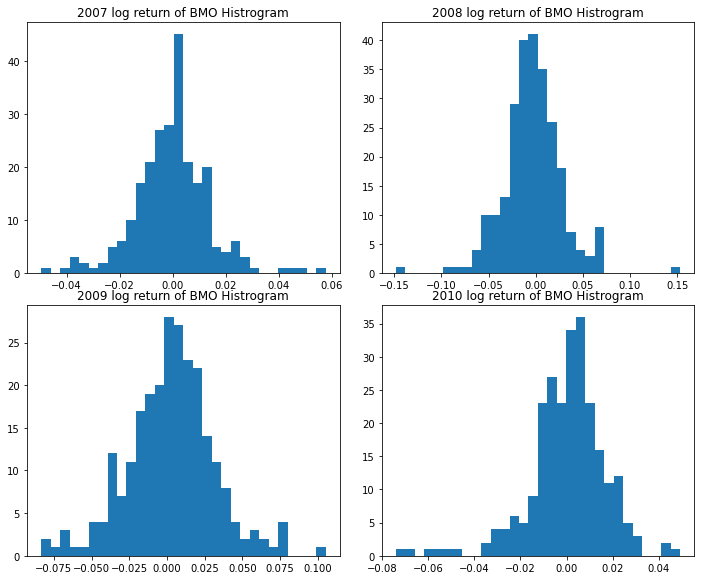

In [21]:
#BMO
#define subplots
fig, ax = plt.subplots(2, 2, figsize=(10,8))
fig.tight_layout()

#create subplots
ax[0, 0].hist(yr_bmo[2007], bins=30,)
ax[0, 0].set_title('2007 log return of BMO Histrogram')
ax[0, 1].hist(yr_bmo[2008], bins=30)
ax[0, 1].set_title('2008 log return of BMO Histrogram')
ax[1, 0].hist(yr_bmo[2009], bins=30)
ax[1, 0].set_title('2009 log return of BMO Histrogram')
ax[1, 1].hist(yr_bmo[2010], bins=30)
ax[1, 1].set_title('2010 log return of BMO Histrogram')

plt.show()

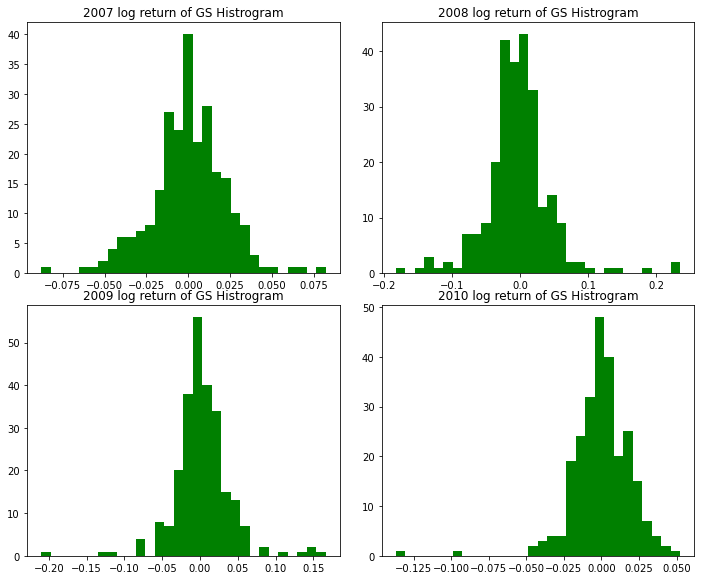

In [22]:
#GS
#define subplots
fig, ax = plt.subplots(2, 2, figsize=(10,8))
fig.tight_layout()

#create subplots
ax[0, 0].hist(yr_gs[2007], bins=30, color = 'green')
ax[0, 0].set_title('2007 log return of GS Histrogram')
ax[0, 1].hist(yr_gs[2008], bins=30, color = 'green')
ax[0, 1].set_title('2008 log return of GS Histrogram')
ax[1, 0].hist(yr_gs[2009], bins=30, color = 'green')
ax[1, 0].set_title('2009 log return of GS Histrogram')
ax[1, 1].hist(yr_gs[2010], bins=30, color = 'green')
ax[1, 1].set_title('2010 log return of GS Histrogram')

plt.show()

### Question 3: Using the log return data for each security, create a table of the means and standard deviations for each year 2007, 2008, 2009, and 2010. How do the returns and standard deviations of the 2008 and 2009 data compare to the 2007 and 2010 data? Why are they different?

In [23]:
df_bmo.head()

,Open,High,Low,Close,Adj Close,Volume,log_return,Year_DF,Year
Date,,,,,,,,,
2007-01-03,59.290001,59.549999,59.029999,59.169998,30.140604,128200,NaN,2007-01-03,2007
2007-01-04,59.049999,59.090000,58.290001,58.790001,29.947041,359600,-0.006443,2007-01-04,2007
2007-01-05,58.590000,58.630001,58.240002,58.549999,29.824797,122100,-0.004091,2007-01-05,2007
2007-01-08,58.400002,58.669998,58.220001,58.330002,29.712721,61900,-0.003765,2007-01-08,2007
2007-01-09,58.250000,58.580002,58.000000,58.459999,29.778942,89100,0.002226,2007-01-09,2007


In [24]:
# grouping by year then calculate mean and sd --- BMO
smy_bmo = df_bmo.groupby('Year').Close.agg(['mean','std'])
smy_bmo.rename(columns={'mean':'BMO close price mean','std':'BMO close price std'}, inplace = True)

In [25]:
# grouping by year then calculate mean and sd --- GS
smy_gs = df_gs.groupby('Year').Close.agg(['mean','std'])
smy_gs.rename(columns={'mean':'GS close price mean','std':'GS close price std'}, inplace = True)

In [26]:
pd.concat([smy_bmo, smy_gs],axis=1)

,BMO close price mean,BMO close price std,GS close price mean,GS close price std
Year,,,,
2007,61.937889,2.815230,211.822709,16.187531
2008,43.493676,8.485523,152.089644,42.537053
2009,39.699405,10.313728,140.839802,34.828572
2010,57.858016,3.550517,155.168175,12.439443


In [27]:
# log return mean and std --- BMO
logsmy_bmo = df_bmo.groupby('Year').log_return.agg(['mean','std'])
logsmy_bmo.rename(columns={'mean':'BMO log return mean','std':'BMO log return std'}, inplace = True)

In [28]:
# log return mean and std --- GS
logsmy_gs = df_gs.groupby('Year').log_return.agg(['mean','std'])
logsmy_gs.rename(columns={'mean':'GS log return mean','std':'GS log return std'}, inplace = True)

In [29]:
pd.concat([logsmy_bmo, logsmy_gs],axis=1)

,BMO log return mean,BMO log return std,GS log return mean,GS log return std
Year,,,,
2007,-0.000178,0.014050,0.000276,0.021911
2008,-0.003122,0.031446,-0.003697,0.049084
2009,0.002880,0.029020,0.002752,0.037936
2010,0.000322,0.016750,-0.000016,0.019651


### Answer for Question 3
### Standard deviations of the 2008 and 2009 data is much greater than the 2007 and 2010 data because there was the great financial crisis between 2008 and 2009. During the financial crisis, volatility in the market was very huge; therefore, the standard deviations in 2008 and 2009 was much higher than 2007 and 2010.